In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [13]:
# Read the data
df = pd.read_csv('spam.csv')

In [14]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
df.shape

(5572, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### 1. Data Cleaning

In [16]:
#drop the unnamed columns as they are not required
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [18]:
#rename the columns v1 and v2
df.columns = ['labels', 'text']

In [19]:
df.head()

,labels,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# one hot encoding for labels column
df['labels'] = df['labels'].map({'ham':0, 'spam':1})

In [23]:
# check for duplicates and remove them
print(df.duplicated().sum())
df.drop_duplicates(keep='first',inplace=True)

In [24]:
df.duplicated().sum()

0

###  2.EDA 

In [26]:
df['labels'].value_counts()

0    4516
1     653
Name: labels, dtype: int64

([<matplotlib.patches.Wedge at 0x259099f7b50>,
 [Text(-0.42519443516002475, -1.0144997251399075, 'ham'),
  Text(0.42519434017570373, 1.014499764949479, 'spam')],
 [Text(-0.23192423736001347, -0.5533634864399495, '87.4%'),
  Text(0.2319241855503838, 0.5533635081542612, '12.6%')])

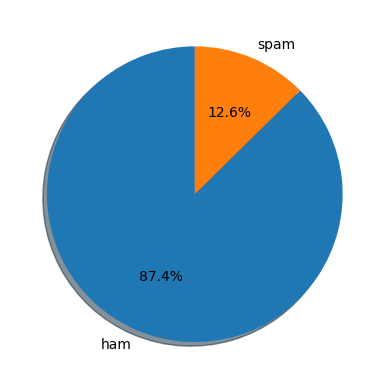

In [27]:
plt.pie(df['labels'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', shadow=True, startangle=90)

* we can conclude that the dataset is imbalanced

In [34]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

In [37]:
#add more features to the dataset
df['length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,labels,text,length,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df[['labels','length','num_words','num_sentences']].groupby('labels').describe().T

labels                         0           1
length        count  4516.000000  653.000000
              mean     70.457263  137.479326
              std      56.357463   30.014336
              min       2.000000   13.000000
              25%      34.000000  131.000000
              50%      52.000000  148.000000
              75%      90.000000  157.000000
              max     910.000000  223.000000
num_words     count  4516.000000  653.000000
              mean     17.123782   27.675345
              std      13.493970    7.011513
              min       1.000000    2.000000
              25%       8.000000   25.000000
              50%      13.000000   29.000000
              75%      22.000000   32.000000
              max     220.000000   46.000000
num_sentences count  4516.000000  653.000000
              mean      1.820195    2.978560
              std       1.383657    1.493185
              min       1.000000    1.000000
              25%       1.000000    2.000000
              50%       1.000000    3.000000
              75%       2.000000    4.000000
              max      38.000000    9.000000

array([<AxesSubplot: title={'center': '0'}>,
       <AxesSubplot: title={'center': '1'}>], dtype=object)

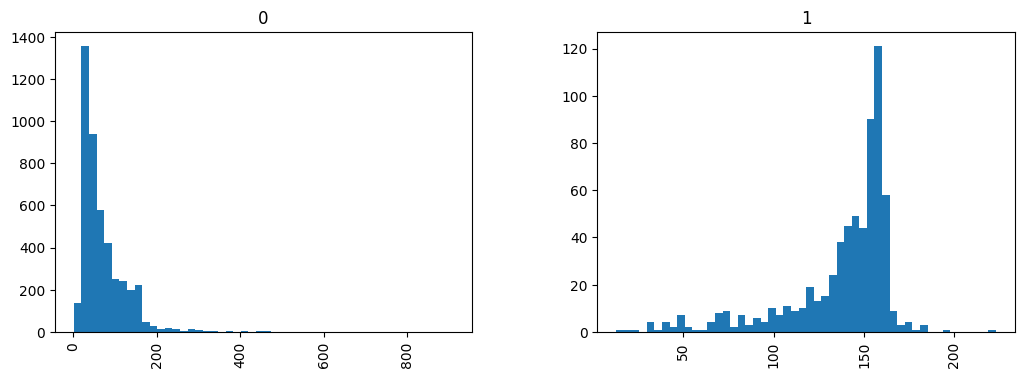

In [45]:
df.hist(column='length', by='labels', bins=50,figsize=(12,4))

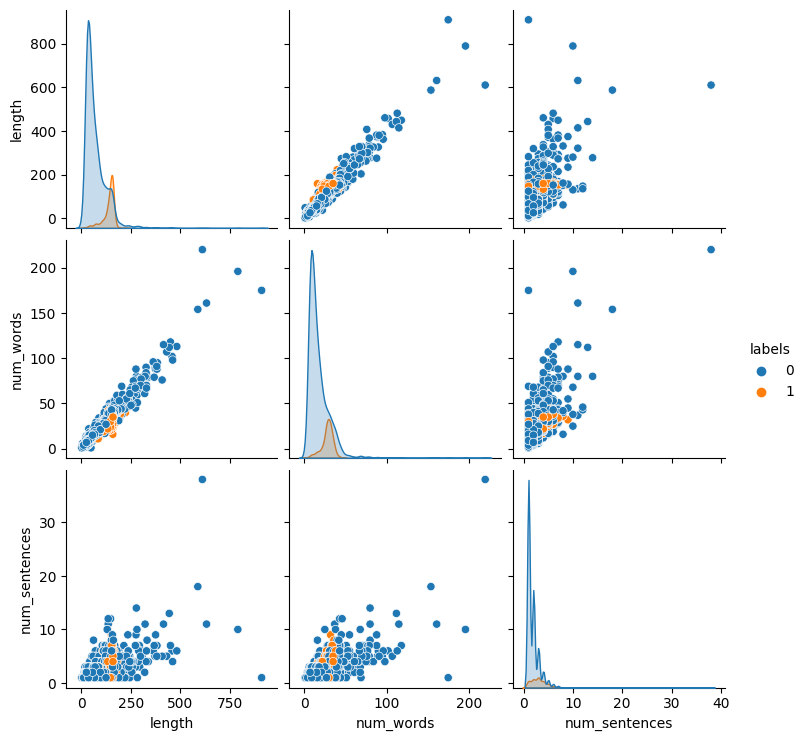

In [46]:
#relationship between the features 
sns.pairplot(df, hue='labels')

<AxesSubplot: >

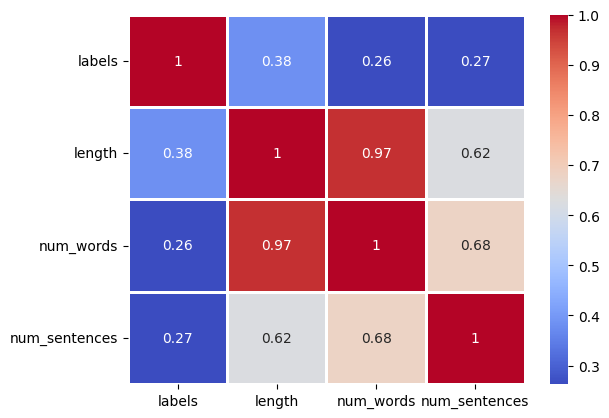

In [47]:
#correlation between the features
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)

### Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuations
* Stemming & Lemmitization

In [50]:
def transform(text):
    text = text.lower()
    #remove punctuation
    text = re.sub(r'[^\w\s]','',text)
    return text


'hello20   hello'

In [61]:
def transform_text(text):
    #lower case
    text = text.lower()
    #remove punctuation
    text = re.sub(r'[^\w\s]','',text)
    #remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [w for w in word_tokens if not w in stop_words]
    #stemming
    ps = PorterStemmer()
    stemmed_text = [ps.stem(w) for w in filtered_text]
    return ' '.join(stemmed_text)

In [53]:
# testing the function
transform_text('I am going to the market to buy some fruits and vegetables')

'go market buy fruit veget'

In [62]:
#creating a new column with the cleaned text
df['new_text'] = df['text'].apply(transform_text)

In [55]:
df.head()

,labels,text,length,num_words,num_sentences,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [63]:
#defining a wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

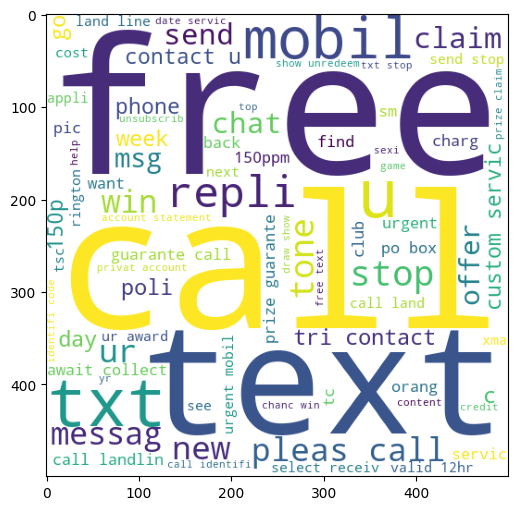

In [64]:
#displaying a wordcloud for ham messages
spam_wc = wc.generate(df[df['labels'] == 1]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

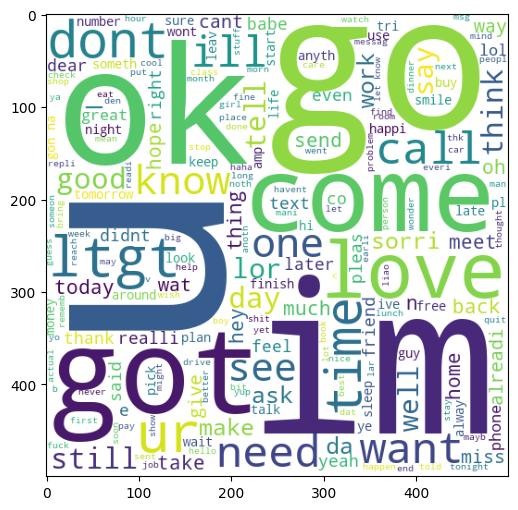

In [65]:
ham_wc = wc.generate(df[df['labels'] == 0]['new_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [71]:
spam_corpus = []
for msg in df[df['labels'] == 1]['new_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [72]:
len(spam_corpus)

10813

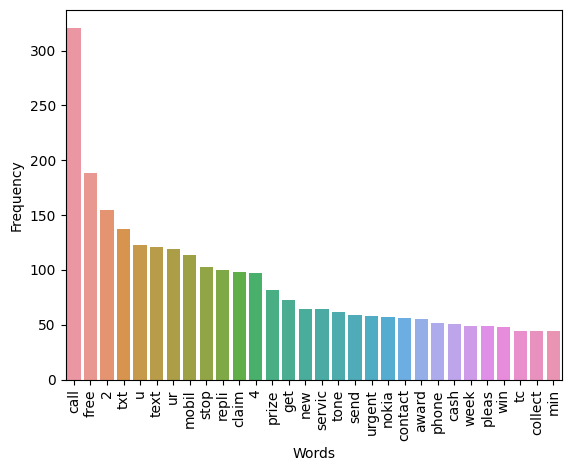

In [74]:
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Words', 'Frequency'])
sns.barplot(x='Words', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [75]:
ham_corpus = []
for msg in df[df['labels'] == 0]['new_text'].tolist():
    for word in msg.split():
      ham_corpus.append(word)

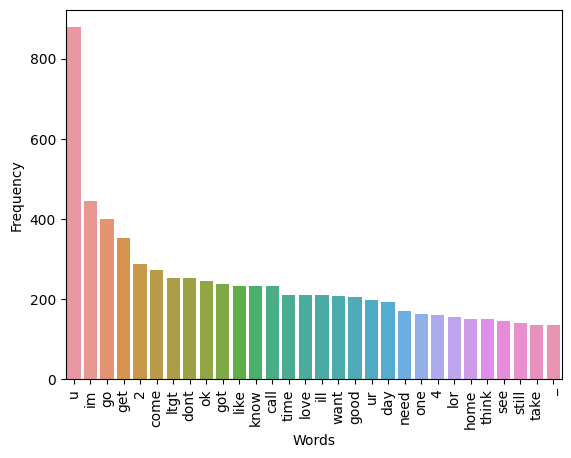

In [76]:
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Words', 'Frequency'])
sns.barplot(x='Words', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

### 4. Creating the  Model